In [4]:
import math
import matplotlib.pyplot as plt 
import numpy as np

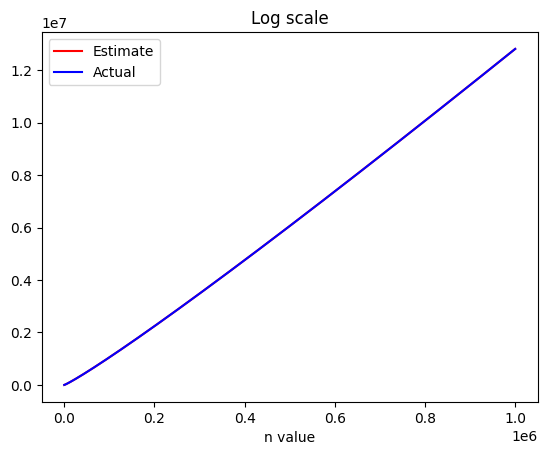

In [30]:
# Question 1
# We cannot plot actual plot because storing n! would lead to large numbers which cannot be store in python
# We apply log on both sides for comparision

def get_value(n) :
    return 0.5 * math.log(2*math.pi*n) + n * math.log(n/math.exp(1))

limit = np.power(10, 6)
actual_values = []
approx_values = []
cal_sum = 0
x_points = []
for n in range(1, limit):
    approx_values.append(get_value(n))
    cal_sum += math.log(n)
    actual_values.append(cal_sum)
    x_points.append(n)

plt.plot(x_points, approx_values, color = 'r', label = "Estimate")
plt.plot(x_points, actual_values, color = 'b', label = 'Actual')

plt.title("Log scale")
plt.xlabel("n value")
plt.legend()
plt.show()


In [37]:
# Question 2
# Typo in question, all positive integers >= 4 is valid number of sides

import matplotlib.pyplot as plt 
import random as rd

class Dice:
    def __init__(self, num = 6):
        if type(num) != int or num < 4:
            raise Exception("Cannot construct the dice")
        self.numSides = num
        self.prob = tuple([1/num for i in range(num)])
    
    def setProb(self, li):
        total = 0
        for ele in li:
            if type(ele) == float or type(ele) == int:
                if ele < 0 :
                    # probablity cannot be less than zero
                    raise Exception("Invalid probability distribution")
                total += ele
            else :
                # Invalid data type
                raise Exception("Invalid probability distribution")
        
        if total != 1:
            raise Exception("Invalid probability distribution")
        
        # Setting the probabilities
        self.prob = li
        self.numSides = len(li)
    
    def __str__ (self) :
        return "Dice with " + str(self.numSides) + "faces and probability distribution" + str(self.prob)
    
    def roll(self, throws):
        barWidth = 0.25
        fig = plt.subplots(figsize =(20, 4)) 

        cdf = [self.prob[0], ]
        for i in range(1, self.numSides):
            cdf.append(cdf[i-1] + self.prob[i])
        freq = [0 for i in range(self.numSides)]
        
        for i in range(throws):
            got = rd.random()  # Throwing the dice
            for i in range(self.numSides):
                if got <= cdf[i] :
                    freq[i] += 1
                    break
        
        br1 = [i+1 for i in range(self.numSides)]
        br2 = [i+1 + barWidth for i in range(self.numSides)]
        plt.bar(br1, freq, width = barWidth, color = 'b', label = "Actual")
        plt.bar(br2, [self.prob[i]*throws for i in range(self.numSides)],  width = barWidth, color = 'r', label = "Expected")
        plt.legend()

        plt.xlabel("Sides")
        plt.ylabel("Occurrences")
        plt.title("Occurrences vs Sides")
        plt.xticks([ele + barWidth/2 for ele in br1], [i+1 for i in range(self.numSides)])
        plt.show()


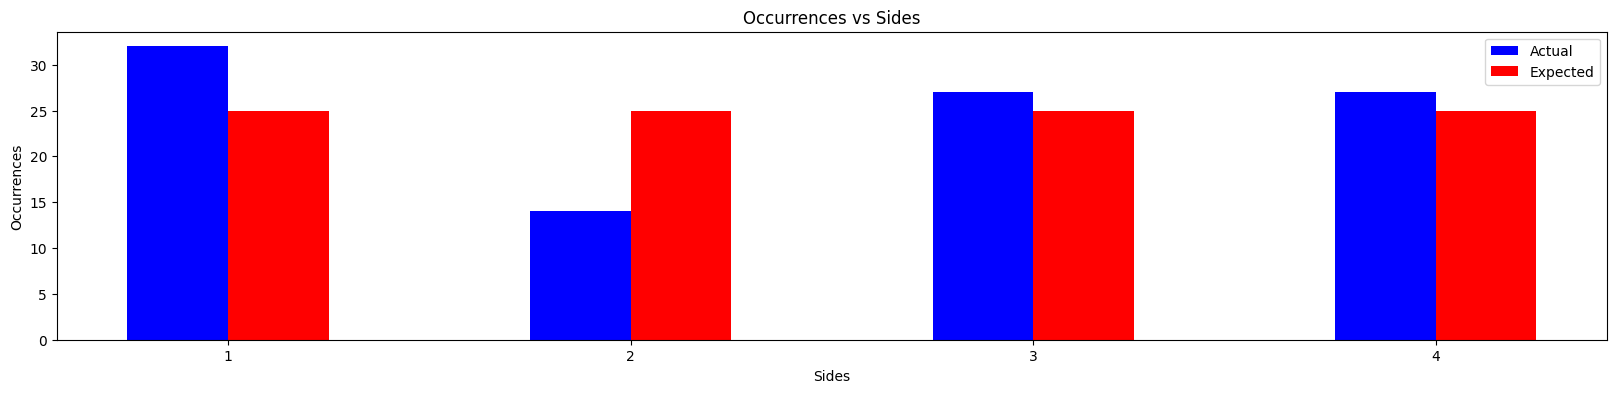

In [39]:
d = Dice(4)
d.roll(100)

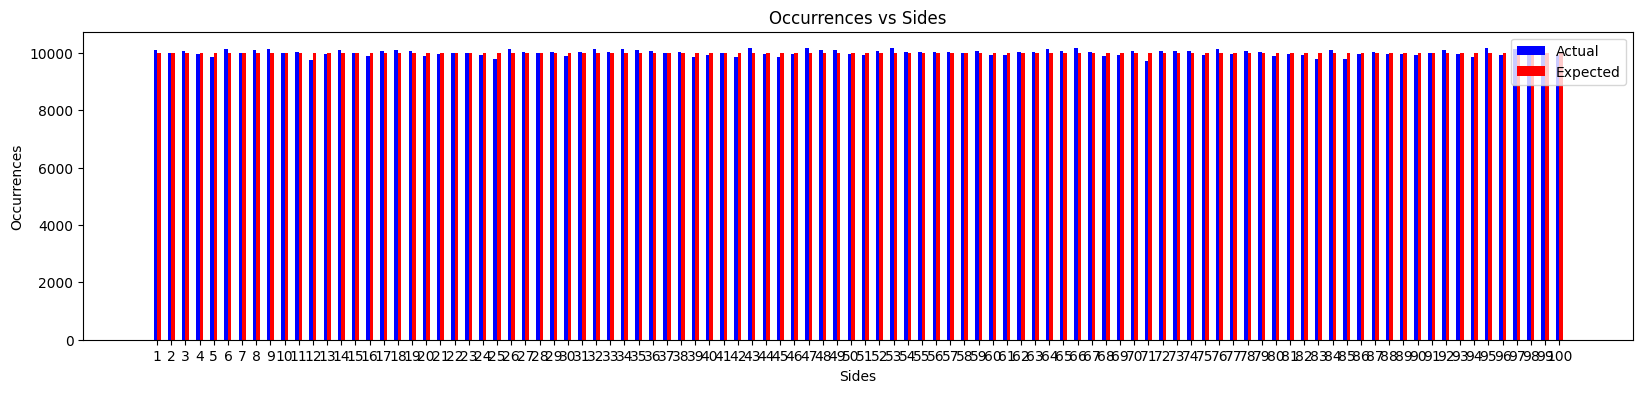

In [42]:
d = Dice(100)
d.roll(1000000)

In [35]:
d = Dice(20)
d.numSides

20

In [36]:
new_d = Dice(2)

Exception: Cannot construct the dice

In [ ]:
new_d.numSides

NameError: name 'new_d' is not defined

In [ ]:
new_d = Dice(5.0)

Exception: Cannot construct the dice

In [ ]:
d = Dice('5')

Exception: Cannot construct the dice

In [ ]:
d = Dice(4)
d.setProb((0.5, 0.2, 0.3, 0.4))

Exception: Invalid probability distribution

In [ ]:
d = Dice(5)
print(d)

Dice with 5faces and probability distribution(0.2, 0.2, 0.2, 0.2, 0.2)


In [ ]:
d = Dice(4)
d.setProb((0.1, 0.2, 0.3, 0.4))
print(d)

Dice with 4faces and probability distribution(0.1, 0.2, 0.3, 0.4)


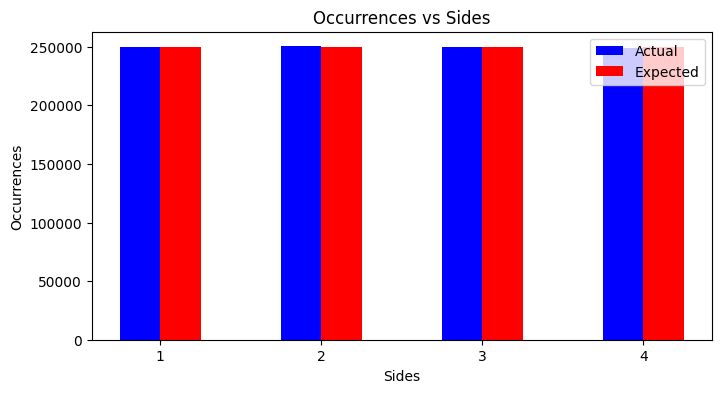

In [ ]:
d = Dice(4)
d.roll(1000000)

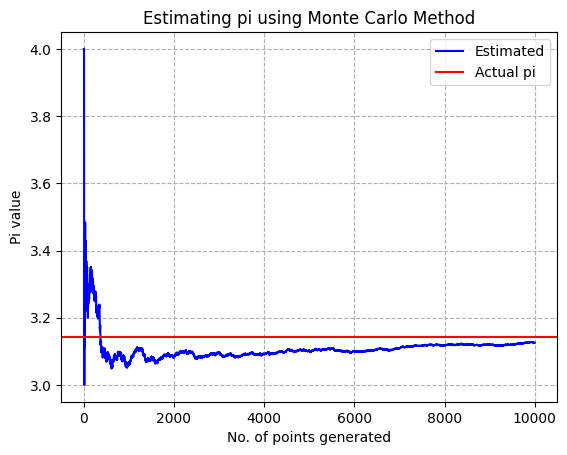

In [53]:
# Question 3
# Estimating pi using Monte Carlo method
import math
def inside_circle(a, b, r, x, y):
    # centre of the circle is (a, b), radius = r and point is (x, y) 
    dis = ((a-x) ** 2 + (b - y) ** 2) ** (0.5)
    if dis <= r :
        return True
    return False

def estimatePi(num):
    count = 0
    x_points = []
    pi_estimated = []

    for i in range(num):
        x = rd.random()
        y = rd.random()
        if inside_circle(0, 0, 1, x, y) :
            count += 1
        pi_estimated.append(4 * count / (i+1))
        x_points.append(i+1)
    
    plt.plot(x_points, pi_estimated, color = 'b', label = 'Estimated')
    plt.axhline(y = math.pi, color = 'r', label = 'Actual pi')
    plt.grid(linestyle = '--')
    
    plt.xlabel("No. of points generated")
    plt.ylabel("Pi value")
    plt.title("Estimating pi using Monte Carlo Method")
    plt.legend()
    plt.show()

estimatePi(10000)

In [56]:
# Question 4
import random as rd
class TextGenerator:
    def __init__(self):
        self.all_words = []
        self.pair_list = dict()

    def assimilateText(self, text_file):
        f = open(text_file, "r")

        prev_word1 = ""
        prev_word2 = ""
        for line in f:
            for word in line.split():
                self.all_words.append(word)
                if prev_word1 == "" :
                    prev_word1 = word
                elif prev_word2 == "":
                    prev_word2 = word
                else :
                    if self.pair_list.get((prev_word1, prev_word2)) == None :
                        self.pair_list[(prev_word1, prev_word2)] = [word, ]
                    else :
                        self.pair_list[(prev_word1, prev_word2)].append(word)
                    prev_word1 = prev_word2
                    prev_word2 = word

    def generateText(self, num, first = ""):
        second = ""
        if first == "":
            # selecting random pair
            point = rd.choices(list(self.pair_list.keys()), weights = [len(ele) for ele in self.pair_list.values()])
            first = point[0][0]
            second = point[0][1]
        else :
            sample_list = []
            for ele in self.pair_list.keys() :
                if ele[0] == first:
                    sample_list.append(ele[1])
            if sample_list == []:
                raise Exception("Unable to produce text with the specified start word.")
            else :
                second = rd.choices(sample_list)[0]
        
        print(first, end = " ")
        for i in range(num):
            print(second, end = " ")
            
            sample_list = []
            for ele in list(self.pair_list[(first, second)]) :
                if self.pair_list.get((second, ele)) == None: # may be last two words of text 
                    if i == num-1: # if it is in last step no problem to take ele
                        sample_list.append(ele)
                else :
                    sample_list.append(ele)
            first = second
            second = rd.choices(sample_list)[0]

In [57]:
t = TextGenerator()
t.assimilateText('sherlock.txt') # training data
t.generateText(1000, "a")

a wink at night.” She pulled a dirty thumb. Ha! And the Rucastles went away.” “He has come from Nature rather than from the room. Accustomed as I will feel sure of you; and I am a widower and have even contributed to the individuality of the house was astir, for I know very well indeed. It is evidently trying to utter the name of good-fortune, did you hope to see all the furniture in the first place, both my hat and all was dark again save the single lurid spark upon the edge. In another instant he stood beside the fire, “you can understand that all is as good as a working hypothesis that it was a few days. It must be a thoroughly good girl in every way to make sure of you; and I carried the precious case lying upon the right-hand side, and yet abstracted fashion which was buttoned only in the yard, and behind this I have only been to Eton and Oxford. His brain is as it should not have been turning out half-crowns by the manner which is a most unpleasant couple, but fortunately I spend

In [58]:
t = TextGenerator()
t.assimilateText('sherlock.txt')
t.generateText(100)

is where we found ourselves as we entered. “Good-morning, madam,” said I, ‘I opened the Gladstone bag as he could better himself and stretched himself out and associate him with the same state of affairs without betraying one who certainly deserved little enough of you to the disappearance of Mr. Rucastle, showing me the flowers. It was soon asleep. “I am glad of a minister in far-gone years will not suffer from her carriage, was the same secrecy which we are able to take charge of murder.” There is no doubt that this matter over.” “A most painful matter to the 

In [59]:
t = TextGenerator()
t.assimilateText('sherlock.txt')
t.generateText(50, 'London')

London hotels.” “How did you address me as governess. I shall keep the flames under. “That’s it!” cried the banker had done with the shutter open, but without noting anything else of interest. They are a benefactor of the door—that is to be little doubt that he is ever a flaw, 

In [60]:
t = TextGenerator()
t.assimilateText('sherlock.txt')
t.generateText(50, 'Wedge') # Should produce an exception

Exception: Unable to produce text with the specified start word.

Practise

In [61]:
# Bassel problem


In [63]:
# Another method of monte carlo mathod to get the value of pi
# Buffons needle problem

import numpy as np
import matplotlib.pyplot as plt

# Function to simulate Buffon's Needle Experiment
def buffon_needle_simulation(num_needles, needle_length, line_spacing):
    # Counters for needles crossing lines and total needles dropped
    crossing_lines = 0
    total_needles = 0

    # staring simulation
    for _ in range(num_needles):
        # Randomly drop the needle on the plane
        needle_center = np.random.uniform(0, line_spacing)
        
        # angle made by dropped needle with horizontal
        needle_angle = np.random.uniform(0, np.pi / 2)

        # Check if the needle crosses a line
        if (needle_center + (needle_length / 2)*np.cos(needle_angle) > line_spacing) or (needle_center - (needle_length / 2)*np.cos(needle_angle) < 0) :
            crossing_lines += 1

        total_needles += 1

    # Estimate of π using Buffon's Needle formula
    if crossing_lines == 0:
        return 0
    else:
        return (2 * needle_length * total_needles) / (crossing_lines * line_spacing)

# Parameters
num_needles = 1000000
needle_length = 2.0  # Set to 2 for simplicity
line_spacing = 3.0   # Set to 3 for simplicity

# Run simulation
estimated_pi = buffon_needle_simulation(num_needles, needle_length, line_spacing)

# Print the result
print(f"Estimated value of π: {estimated_pi}")

Estimated value of π: 3.1479133662762466


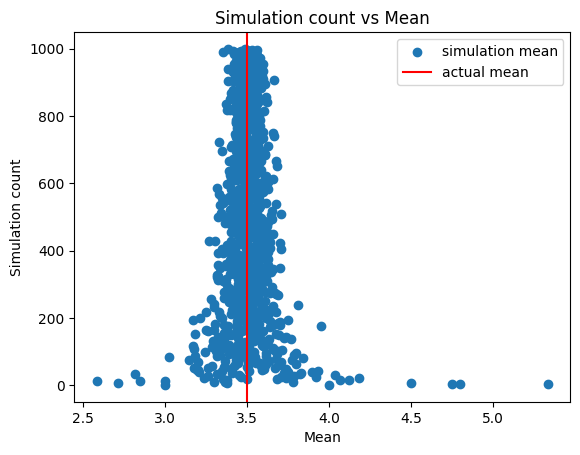

In [86]:
# Central limit theorem
# Plotting mean (which is also R.V) 
# Central limit theorem says mean R.V is standard normal distribution

import random

def simulateDice(n, sample_space, simulation_count):
    # un-biased dice
    freq = [0 for _ in range(n)]

    for _ in range(simulation_count):
        freq[random.choice(sample_space) - 1] += 1
    
    prob = [ele / simulation_count for ele  in freq]
    return prob

# for discrete random variable
def find_mean(sample_space, prob):
    return sum([x*px for x, px in zip(sample_space, prob)])

n = 6
sample_space = [i + 1 for i in range(n)]
number_of_samples = []
mean = []
for i in range(1, 1000):
    prob = simulateDice(n, sample_space, i)
    u = find_mean([i for i in range(1, 7)], prob)
    number_of_samples.append(i)
    mean.append(u)

actual_mean = n*(n+1)/2/n
plt.scatter(mean, number_of_samples, label = 'simulation mean')
plt.axvline(x = actual_mean, color = 'red', label = 'actual mean')
plt.ylabel("Simulation count")
plt.xlabel("Mean")
plt.title('Simulation count vs Mean')
plt.legend()
plt.show()


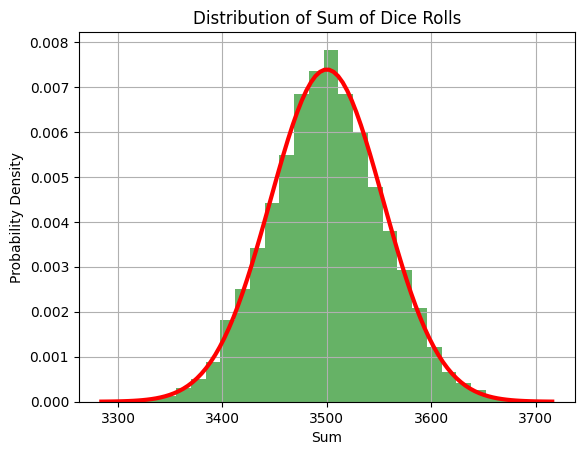

In [93]:
# Code by chat gpt

import numpy as np
import matplotlib.pyplot as plt

# Number of dice rolls per trial
n = 1000

# Number of trials
m = 10000

# Function to simulate rolling a fair six-sided die n times and return the sum
def roll_dice_sum(n):
    return np.sum(np.random.randint(1, 7, size=n))

# Simulate rolling the dice m times and record the sum for each trial
sums = np.array([roll_dice_sum(n) for _ in range(m)])

# Plotting the histogram of sums
plt.hist(sums, bins=30, density=True, alpha=0.6, color='g')

# Plotting the theoretical normal distribution
mu = n * (1+6)/2  # Mean of the sum of a single die roll
sigma = np.sqrt(n * (6**2 - 1) / 12)  # Standard deviation of the sum of a single die roll
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2)), linewidth=3, color='r')

plt.title('Distribution of Sum of Dice Rolls')
plt.xlabel('Sum')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()